In [1]:
# Notebook setup
import xarray as xr
import pandas as pd
import numpy as np
#!pip install netcdf4
#!pip install seawater
import seawater
import gsw

import matplotlib.pyplot as plt

In [2]:
#load dataset
data=pd.read_csv('Cape Darnley/Combined_Cape_Darnley_Data.csv')
ts=data[['temp', 'salt', 'depth', 'year']]
df=ts.sort_values('temp',ascending=True)
df['dens']=seawater.eos80.pden(df['salt'],df['temp'],df['depth'],pr=0)

#find min & max values for temp & salinity
mint=np.min(df['temp'])
maxt=np.max(df['temp'])

mins=np.min(df['salt'])
maxs=np.max(df['salt'])

In [11]:
df.depth

34      37
33      36
32      35
35      38
36      39
      ... 
159    162
155    158
156    159
158    161
157    160
Name: depth, Length: 3750, dtype: int64

In [3]:
#calculate seawater density from temp & salinity
#may need to change the hard coded number at end to however many data points you have
tempL=np.linspace(mint-1,maxt+1,285)
salL=np.linspace(mins-1,maxs+1,285)

Tg, Sg = np.meshgrid(tempL,salL)
#sigma_theta = gsw.sigma0(Sg, Tg)
#sigma_theta = seawater.eos80.pden(Sg, Tg, 0)
#may need to change the hard coded number at end to however many data points you have
#cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),285)

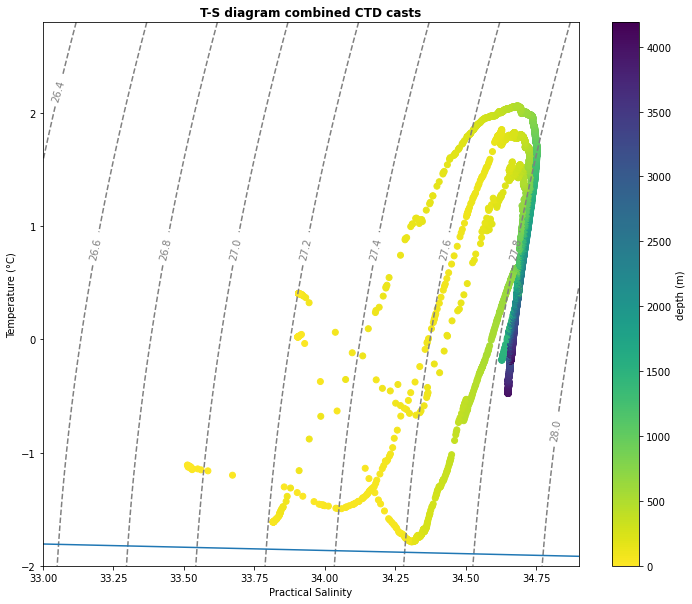

In [6]:
#cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),285)

# TS Diagram with density contours
plt.figure(figsize=(12,10))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(-2, 3, .2)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

#freezing point
FP0=seawater.eos80.fp(x, 0)
FP0=seawater.eos80.fp(x, 0)

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.2))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')


# Plot the data
#nprof = 25 #Selected profile
plt.plot(x,FP0)

#code for colouring by CTD cast 
scat = plt.scatter(df['salt'],df['temp'], c=df.year.astype('category').cat.codes)
#scat = plt.scatter(df['salt'],df['temp'], hue = df['year'], palette=['blue','orange', 'green', 'red'])

yr_names = ['Feb 1993 - 579m', 'May 1996 - 617m', 'Feb 2006 - 96m', 'Dec 2018 - 673m']
plt.legend(handles=scat.legend_elements()[0], labels=yr_names, loc='upper left', fontsize=12)


#code for colouring by depth
plt.scatter(df['salt'],df['temp'], c=df['depth'], cmap='viridis_r')
plt.xlabel('Practical Salinity');
plt.ylabel('Temperature (°C)')
plt.title(('T-S diagram combined CTD casts'), fontweight='bold');

cbh = plt.colorbar(label='depth (m)');



plt.savefig("TS diagram combined year.jpg") #save as jpg
plt.savefig("TS diagram combined year.png") #save as png